### 逻辑回归中使用正则化

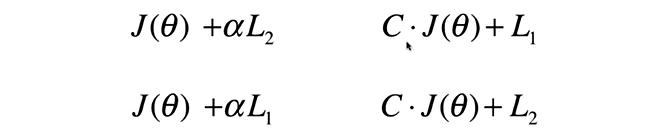

系数的的设置是为了,给某项进行集中火力进行调参

查看scikit-learn.org当中如何使用逻辑回归的

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(8)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5, dtype='int')
for _ in range(20):   # 添加噪音
    y[np.random.randint(200)] = 1

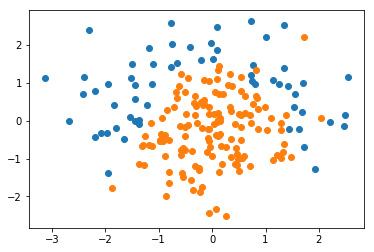

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### 使用sklearn的逻辑回归

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

模式使用L2的进行penalty='l2'，进行模型的正则化

In [7]:
log_reg.score(X_train, y_train)

0.7866666666666666

In [8]:
log_reg.score(X_test, y_test)

0.78

In [9]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF69D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


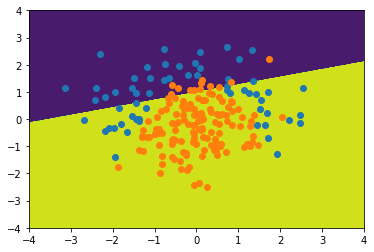

In [11]:
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

尝试使用多项式进行

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
def PolynomalLogistRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ('log_reg',LogisticRegression() )
    ])

In [15]:
poly_log_reg = PolynomalLogistRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [16]:
poly_log_reg.score(X_train, y_train)

0.94

In [18]:
poly_log_reg.score(X_test, y_test)

0.92

绘制一下决策边界

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


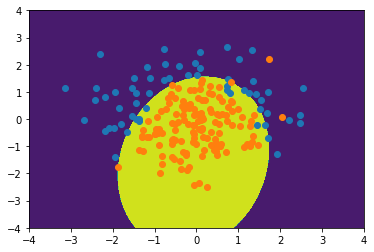

In [19]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


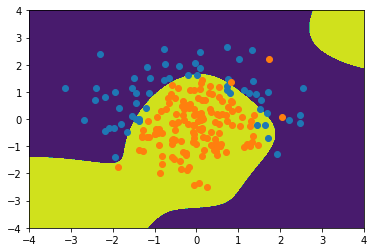

In [21]:
poly_log_reg2 = PolynomalLogistRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [22]:
poly_log_reg2.score(X_train, y_train)

0.9466666666666667

接着看一下他的泛化能力

In [23]:
poly_log_reg2.score(X_test, y_test)

0.88

可以看出他有一定的过拟合的现象存在

绘制此时的分类边界

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


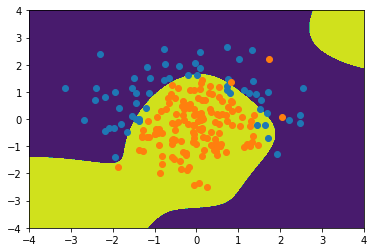

In [24]:
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

在试试参数C进行调整

In [25]:
def PolynomalLogistRegression_(degree, C):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ('log_reg',LogisticRegression(C=C) )
    ])

In [26]:
poly_log_reg3 = PolynomalLogistRegression_(degree=20, C=0.1)

In [28]:
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [29]:
poly_log_reg3.score(X_train, y_train)

0.92

In [30]:
poly_log_reg3.score(X_test, y_test)

0.82

绘制此时的决策边界

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


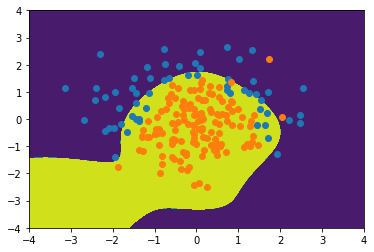

In [31]:
plot_decision_boundary(poly_log_reg3,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

尝试一下L1正则项

In [32]:
def PolynomalLogistRegression__(degree, C, penalty='l2'):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ('log_reg',LogisticRegression(C=C, penalty=penalty) )
    ])

In [33]:
poly_log_reg4 = PolynomalLogistRegression__(20, 0.1,'l1' )

In [35]:
poly_log_reg4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [36]:
poly_log_reg4.score(X_train, y_train)

0.94

In [37]:
poly_log_reg4.score(X_test, y_test)

0.88

沪指决策边界

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


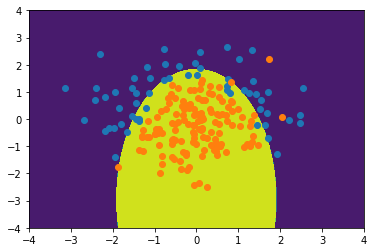

In [38]:
plot_decision_boundary(poly_log_reg4,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])